First we import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Now we import the dataset

In [2]:
df = pd.read_csv('iplbat.csv')

In [3]:
df.head()

,Player,Span,Mat,Inns,NO,RunsDescending,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,V Kohli,2008-2025,267.0,259,40,8661,113*,39.54,6519,132.85,8,63,10,771,291,investigate this query
1,"(Royal Challengers Bangalore, Royal Challenger...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RG Sharma,2008-2025,272.0,267,30,7046,109*,29.72,5334,132.09,2,47,18,640,302,investigate this query
3,"(Deccan Chargers, Mumbai Indians)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S Dhawan,2008-2024,222.0,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,investigate this query


We notice the team names are given in every other column and we won't be requiring those. So we must remove them.

In [4]:
df = df[::2]
df.head()

,Player,Span,Mat,Inns,NO,RunsDescending,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,V Kohli,2008-2025,267.0,259,40,8661,113*,39.54,6519,132.85,8,63,10,771,291,investigate this query
2,RG Sharma,2008-2025,272.0,267,30,7046,109*,29.72,5334,132.09,2,47,18,640,302,investigate this query
4,S Dhawan,2008-2024,222.0,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,investigate this query
6,DA Warner,2009-2024,184.0,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236,investigate this query
8,SK Raina,2008-2021,205.0,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,investigate this query


Now we extract some information about the basic characterestics of the dataset. There are 772 rows and 16 columns.

In [5]:
print(df.shape)
print(df.dtypes)

(772, 16)
Player             object
Span               object
Mat               float64
Inns               object
NO                 object
RunsDescending     object
HS                 object
Ave                object
BF                 object
SR                 object
100                object
50                 object
0                  object
4s                 object
6s                 object
Unnamed: 15        object
dtype: object


Now we remove the unnecessary 'Unnamed: 15' column and change the names of the rest of the columns

In [6]:
df.drop('Unnamed: 15', axis=1, inplace=True)
df.rename(columns={'Player':'player', 'Mat':'matches', 'Inns':'innings', 'NO':'not out', 'RunsDescending':'runs', 'HS':'highest score', 'Ave':'average', 'BF':'balls faced',
                  'SR':'strike rate', '100':'100s', '50':'50s', '0':'ducks', '4s':'fours', '6s':'sixes'}, inplace=True)
df.head()

,player,Span,matches,innings,not out,runs,highest score,average,balls faced,strike rate,100s,50s,ducks,fours,sixes
0,V Kohli,2008-2025,267.0,259,40,8661,113*,39.54,6519,132.85,8,63,10,771,291
2,RG Sharma,2008-2025,272.0,267,30,7046,109*,29.72,5334,132.09,2,47,18,640,302
4,S Dhawan,2008-2024,222.0,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
6,DA Warner,2009-2024,184.0,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236
8,SK Raina,2008-2021,205.0,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203


We now remove the asteriks from the highest scores and convert all the non numeric columns into numeric

In [7]:
df['highest score'] = df['highest score'].str.replace('*', '')
df[['innings', 'not out', 'runs', 'highest score', 'average', 'balls faced', 'strike rate', '100s', '50s', 'ducks', 'fours', 'sixes']] = df[['innings', 'not out', 'runs', 'highest score', 'average', 'balls faced', 'strike rate', '100s', '50s', 'ducks', 'fours', 'sixes']].apply(
    pd.to_numeric, errors='coerce'
)
df.dtypes

player            object
Span              object
matches          float64
innings          float64
not out          float64
runs             float64
highest score    float64
average          float64
balls faced      float64
strike rate      float64
100s             float64
50s              float64
ducks            float64
fours            float64
sixes            float64
dtype: object

Now we check for null values in our dataset and proceed to remove them, if there are any.

In [8]:
df.isnull().sum()

player             0
Span               0
matches            0
innings           66
not out           66
runs              66
highest score     66
average          118
balls faced       66
strike rate       70
100s              66
50s               66
ducks             66
fours             66
sixes             66
dtype: int64

In [9]:
df.dropna(subset=['innings', 'strike rate', 'average'], inplace=True)
df.isnull().sum()

player           0
Span             0
matches          0
innings          0
not out          0
runs             0
highest score    0
average          0
balls faced      0
strike rate      0
100s             0
50s              0
ducks            0
fours            0
sixes            0
dtype: int64

Here we have calculated some basic descriptive statistics of our dataset. There are 653 rows now after cleaning the dataset.

In [10]:
df.describe()

,matches,innings,not out,runs,highest score,average,balls faced,strike rate,100s,50s,ducks,fours,sixes
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,39.068913,27.401225,6.306279,543.258806,40.188361,16.448361,411.402757,107.915375,0.168453,2.808576,2.148545,49.068913,21.924962
std,48.916542,41.466242,9.744964,1101.247953,35.105316,10.952667,814.025388,38.694652,0.702177,7.343570,2.997594,103.348522,46.086630
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,4.000000,1.000000,20.000000,12.000000,7.750000,23.000000,85.710000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19.000000,10.000000,3.000000,92.000000,28.000000,14.810000,84.000000,113.670000,0.000000,0.000000,1.000000,8.000000,3.000000
75%,52.000000,30.000000,8.000000,422.000000,65.000000,24.450000,339.000000,133.980000,0.000000,1.000000,3.000000,39.000000,19.000000
max,278.000000,267.000000,100.000000,8661.000000,175.000000,69.000000,6519.000000,212.640000,8.000000,63.000000,19.000000,771.000000,357.000000


The data cleaning and manipulation is done, now we begin our analysis. First we visualize the top 10 batsmen by total runs

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'RG Sharma'),
  Text(2, 0, 'S Dhawan'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'SK Raina'),
  Text(5, 0, 'MS Dhoni'),
  Text(6, 0, 'KL Rahul'),
  Text(7, 0, 'AB de Villiers'),
  Text(8, 0, 'AM Rahane'),
  Text(9, 0, 'CH Gayle')])

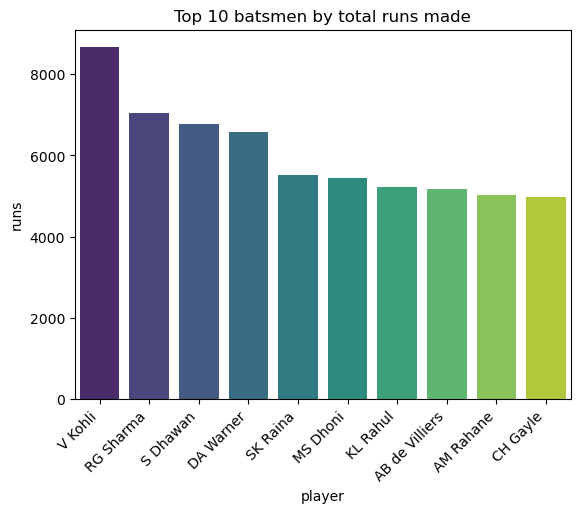

In [11]:
sns.barplot(data=df.head(10), x='player', y='runs', palette='viridis', hue='player')
plt.title('Top 10 batsmen by total runs made')
plt.xticks(rotation=45, ha='right')

Lets find the top 10 highest individual scores in an inning and plot them

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'BB McCullum'),
  Text(2, 0, 'Abhishek Sharma'),
  Text(3, 0, 'Q de Kock'),
  Text(4, 0, 'AB de Villiers'),
  Text(5, 0, 'KL Rahul'),
  Text(6, 0, 'Shubman Gill'),
  Text(7, 0, 'RR Pant'),
  Text(8, 0, 'M Vijay'),
  Text(9, 0, 'DA Warner')])

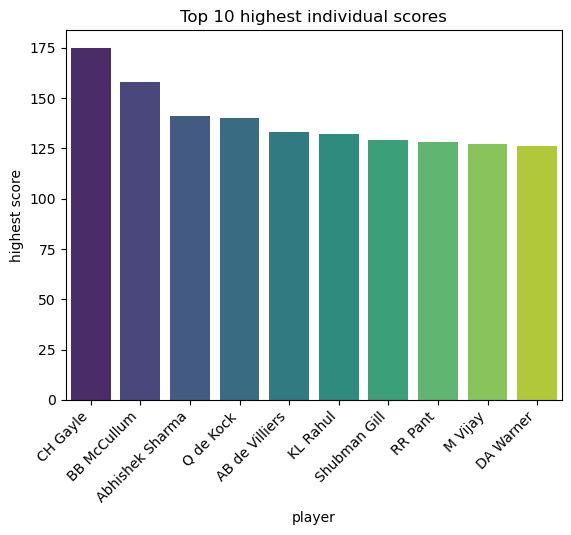

In [12]:
hs = df.sort_values(by='highest score', ascending=False)
sns.barplot(data=hs.head(10), x='player', y='highest score', palette='viridis', hue='player')
plt.title('Top 10 highest individual scores')
plt.xticks(rotation=45, ha='right')

Now we visualise the top 10 highest strike rates for batsmen who have made atleast 1000 runs. Reason behind this criteria is that it allows us to analyse those batsmen who have spent a respectable amount of time on the crease, have played a relevant amount of matches and have scored a good amount of runs.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PD Salt'),
  Text(1, 0, 'AD Russell'),
  Text(2, 0, 'TM Head'),
  Text(3, 0, 'H Klaasen'),
  Text(4, 0, 'N Pooran'),
  Text(5, 0, 'SP Narine'),
  Text(6, 0, 'Abhishek Sharma'),
  Text(7, 0, 'LS Livingstone'),
  Text(8, 0, 'V Sehwag'),
  Text(9, 0, 'GJ Maxwell')])

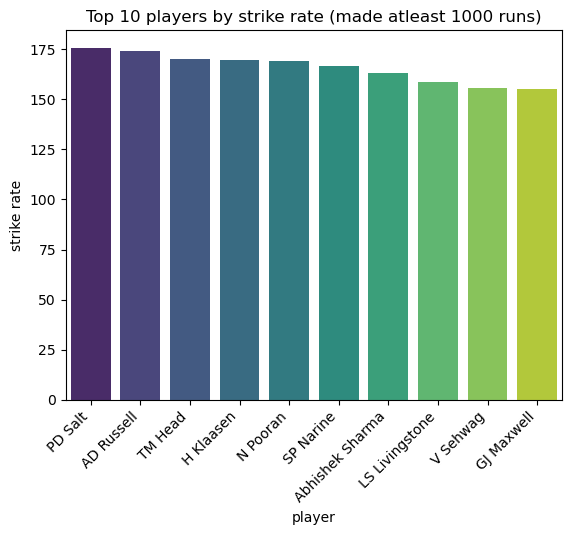

In [13]:
sr = df.sort_values(by='strike rate', ascending=False)
sns.barplot(data=sr[sr['runs'] >= 1000].head(10), x='player', y='strike rate', palette='viridis', hue='player')
plt.title('Top 10 players by strike rate (made atleast 1000 runs)')
plt.xticks(rotation=45, ha='right')

Now we do the same for batting average

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'B Sai Sudharsan'),
  Text(1, 0, 'KL Rahul'),
  Text(2, 0, 'DP Conway'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'RD Gaikwad'),
  Text(5, 0, 'H Klaasen'),
  Text(6, 0, 'JC Buttler'),
  Text(7, 0, 'LMP Simmons'),
  Text(8, 0, 'SE Marsh'),
  Text(9, 0, 'JP Duminy')])

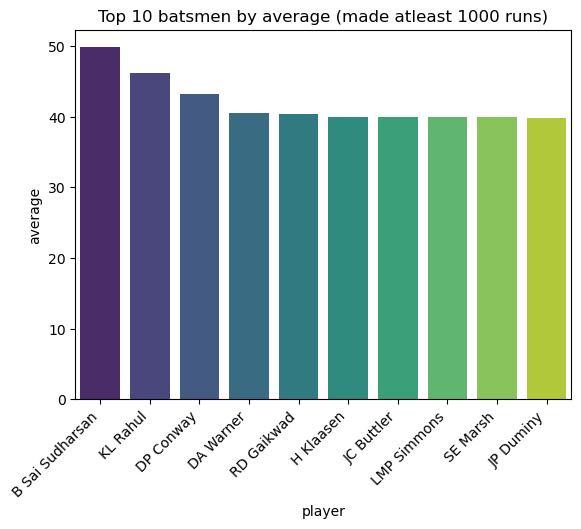

In [14]:
avg= df.sort_values(by='average', ascending=False)
sns.barplot(data=avg[avg['runs'] >= 1000].head(10), x='player', y='average', palette='viridis', hue='player')
plt.title('Top 10 batsmen by average (made atleast 1000 runs)')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'RG Sharma'),
  Text(2, 0, 'V Kohli'),
  Text(3, 0, 'MS Dhoni'),
  Text(4, 0, 'AB de Villiers'),
  Text(5, 0, 'DA Warner'),
  Text(6, 0, 'KA Pollard'),
  Text(7, 0, 'AD Russell'),
  Text(8, 0, 'SV Samson'),
  Text(9, 0, 'KL Rahul')])

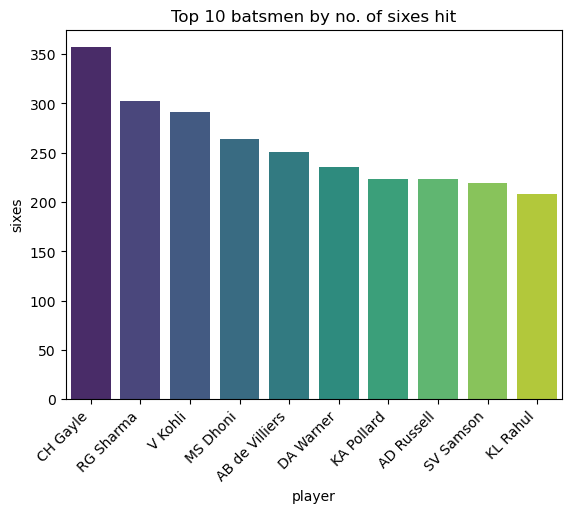

In [16]:
sixers = df.sort_values(by='sixes', ascending=False)
sns.barplot(data=sixers.head(10), x='player', y='sixes', palette='viridis', hue='player')
plt.title('Top 10 batsmen by no. of sixes hit')
plt.xticks(rotation=45, ha='right')

Now we calculate the 'boundary percentage' i.e. the percentage of total runs a batter scores from boundaries (fours and sixes). It demonstrates a batter's power hitting and quick scoring ability in a short format like T20. We will do this for batsmen who have made atleast 1000 runs.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SP Narine'),
  Text(1, 0, 'AD Russell'),
  Text(2, 0, 'PD Salt'),
  Text(3, 0, 'CH Gayle'),
  Text(4, 0, 'Prabhsimran Singh'),
  Text(5, 0, 'YBK Jaiswal'),
  Text(6, 0, 'AC Gilchrist'),
  Text(7, 0, 'TM Head'),
  Text(8, 0, 'V Sehwag'),
  Text(9, 0, 'Abhishek Sharma')])

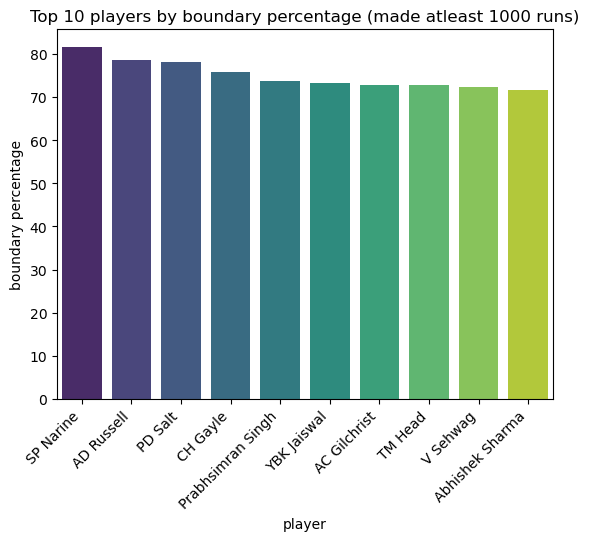

In [17]:
df['boundary runs'] = 4*df['fours'] + 6*df['sixes']
df['boundary percentage'] = (df['boundary runs'] / df['runs']) * 100
boundaries = df.sort_values(by='boundary percentage', ascending=False)
sns.barplot(data=boundaries[boundaries['runs'] >= 1000].head(10), x='player', y='boundary percentage', palette='viridis', hue='player')
plt.title('Top 10 players by boundary percentage (made atleast 1000 runs)')
plt.xticks(rotation=45, ha='right')

We now try to find the relationship between strike rates and averages using a scatter plot.

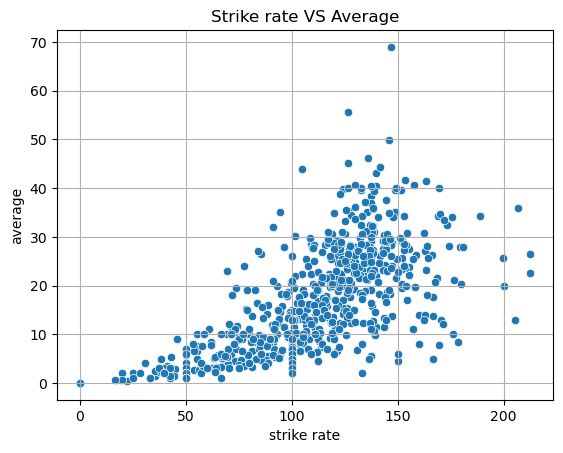

In [15]:
sns.scatterplot(data=df, x='strike rate', y='average')
plt.title('Strike rate VS Average')
plt.grid(True)

Now we try to find the relationship between batter average and boundary percentage using a scatter plot.

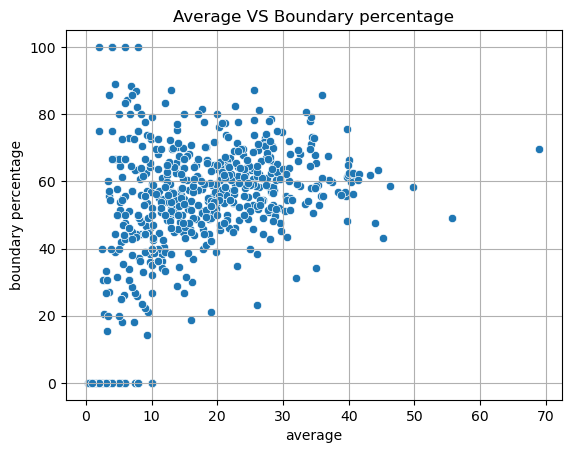

In [18]:
sns.scatterplot(data=df, x='average', y='boundary percentage')
plt.title('Average VS Boundary percentage')
plt.grid(True)

Now we will do a correlation analysis between the different metrics and variables

Text(0.5, 1.0, 'Correlation Heatmap')

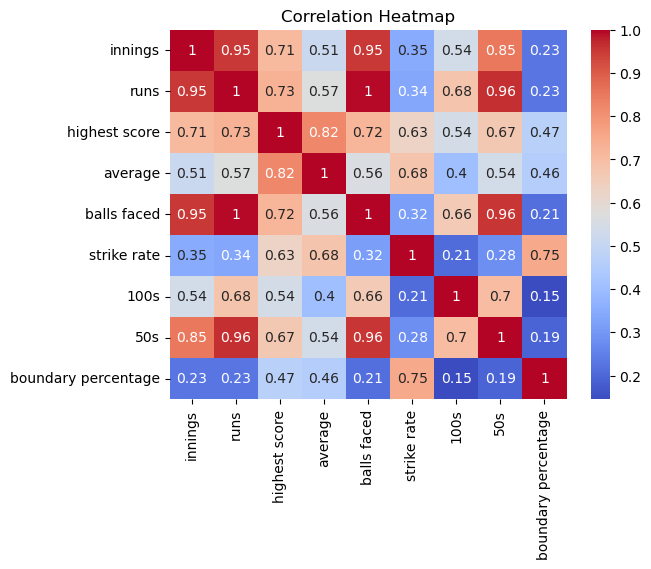

In [19]:
sns.heatmap(df[['innings', 'runs', 'highest score', 'average', 'balls faced', 'strike rate', '100s', '50s', 'boundary percentage']].corr(), 
            cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')

We will now do a regression analysis to predict the total runs of a batsmen from the following variables: balls faced, innings, fours, sixes and not outs. Note that indicators like strike rates and averages won't be used as they are themselves calculated from the total runs so using them will lead to an inflated accuracy of prediction. For this first we check if there are null values in the required columns and remove them.

In [20]:
df.isnull().sum()

player                  0
Span                    0
matches                 0
innings                 0
not out                 0
runs                    0
highest score           0
average                 0
balls faced             0
strike rate             0
100s                    0
50s                     0
ducks                   0
fours                   0
sixes                   0
boundary runs           0
boundary percentage    17
dtype: int64

In [21]:
df.dropna(subset='boundary percentage', inplace=True)
df.isnull().sum()

player                 0
Span                   0
matches                0
innings                0
not out                0
runs                   0
highest score          0
average                0
balls faced            0
strike rate            0
100s                   0
50s                    0
ducks                  0
fours                  0
sixes                  0
boundary runs          0
boundary percentage    0
dtype: int64

Now we start by defining the target/dependent (y) and features/independent variables (x).

In [22]:
x = df[['balls faced', 'innings', 'not out', 'sixes', 'fours']]
y = df['runs']

Now we split the data into two different sets: 'Train set' to train our model and the 'Test' set to test our model. We will use 80% of the data to train the model and 20% to test it.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Now we will create and train the model.

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Now we will make predictions using the testing set and evaluate our model by comparing the predictions with the atcual values using metrics like R-square, Mean absolute error, Mean squared error and Root mean squared error.

In [25]:
predictions = model.predict(x_test)

In [26]:
print('R-square: ', metrics.r2_score(y_test, predictions))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R-square:  0.9990804474662421
Mean Absolute Error:  18.68379379402147
Mean Squared Error:  1078.0739254276805
Root Mean Squared Error:  32.83403608190258


Here, we have got a R-square value of nearly 0.999 which may indiciate overfitting. To rule out an instance of overfitting, we find the R-squared values for training and test sets seperately.

In [27]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print(f"Training R-squared: {train_score}")
print(f"Test R-squared: {test_score}")

Training R-squared: 0.998957614568785
Test R-squared: 0.9990804474662421


Both the R-square values for the training and testing sets are nearly the same at around 0.999, so we can rule out overfitting in our model. We can conclude our model fitted well and the relationships between the variables are exceptionally strong and predictable. Now we plot the predicted and actual values in a scatterplot and a 45-degree reference line for better visualisation.

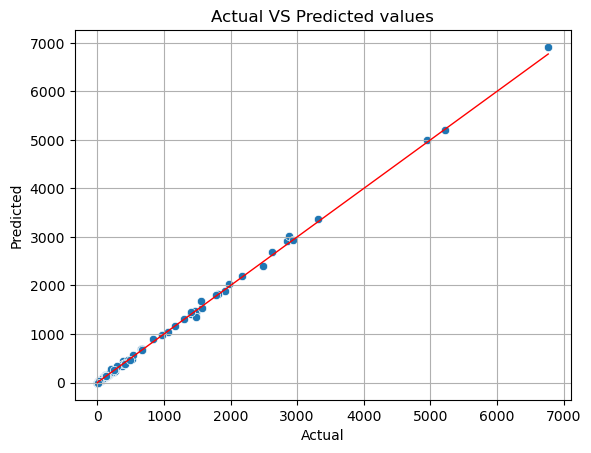

In [28]:
sns.scatterplot(x=y_test, y=predictions)
plt.grid(True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=1)
plt.show()